<a href="https://colab.research.google.com/github/zhus-dika/ERI-task/blob/main/eri_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦋 Gross Domestic Product (GDP) in Kazakhstan

### 🦜 Imports

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# https://tradingeconomics.com/kazakhstan/gdp
gdps = [261.42, 225.5, 197.11, 171.08, 181.67, 179.34, 166.81, 137.28, 184.39, 221.42, 236.63, 208, 192.63, 148.05, 115.31, 133.44, 104.85, 81, 57.12, 43.15]
gdps.reverse()

In [3]:
it = 0
for year in range(2004, 2024):
    print(f'year: {year}, gdp: {gdps[it]} USD billion')
    it += 1

year: 2004, gdp: 43.15 USD billion
year: 2005, gdp: 57.12 USD billion
year: 2006, gdp: 81 USD billion
year: 2007, gdp: 104.85 USD billion
year: 2008, gdp: 133.44 USD billion
year: 2009, gdp: 115.31 USD billion
year: 2010, gdp: 148.05 USD billion
year: 2011, gdp: 192.63 USD billion
year: 2012, gdp: 208 USD billion
year: 2013, gdp: 236.63 USD billion
year: 2014, gdp: 221.42 USD billion
year: 2015, gdp: 184.39 USD billion
year: 2016, gdp: 137.28 USD billion
year: 2017, gdp: 166.81 USD billion
year: 2018, gdp: 179.34 USD billion
year: 2019, gdp: 181.67 USD billion
year: 2020, gdp: 171.08 USD billion
year: 2021, gdp: 197.11 USD billion
year: 2022, gdp: 225.5 USD billion
year: 2023, gdp: 261.42 USD billion


In [4]:
pd_gdps = pd.DataFrame({'year': range(2004, 2024), 'gdp': gdps})
pd_gdps['year'] = pd_gdps['year'].astype(str)
pd_gdps.set_index('year', inplace=True)

In [5]:
pd_gdps

,gdp
year,
2004,43.15
2005,57.12
2006,81.00
2007,104.85
2008,133.44
2009,115.31
2010,148.05
2011,192.63
2012,208.00


# 🐮 Hodrick-Prescott filtering

In [6]:
cycle, trend = sm.tsa.filters.hpfilter(pd_gdps.gdp, 6.25)

In [7]:
gdp_decomp = pd_gdps[['gdp']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

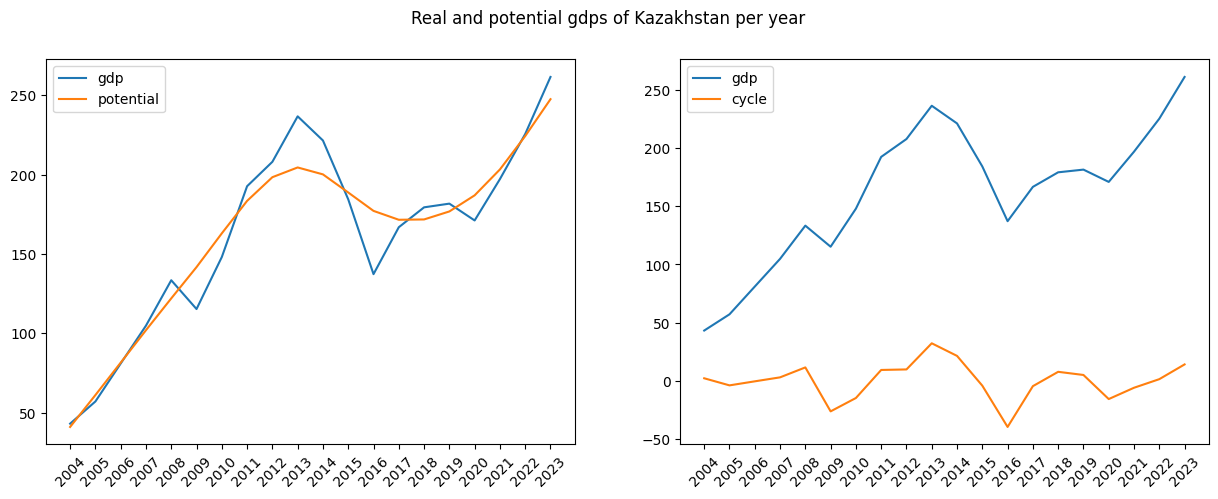

In [8]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].plot(gdp_decomp["gdp"], label='gdp')
ax[0].plot(gdp_decomp["trend"], label='potential')
ax[0].legend()
ax[0].set_xticks(gdp_decomp.index)
ax[0].set_xticklabels(gdp_decomp.index, rotation=45)


ax[1].plot(gdp_decomp["gdp"], label='gdp')
ax[1].plot(gdp_decomp["cycle"], label='cycle')
ax[1].legend()
ax[1].set_xticks(gdp_decomp.index)
ax[1].set_xticklabels(gdp_decomp.index, rotation=45)

fig.suptitle('Real and potential gdps of Kazakhstan per year')
plt.show()

# 🦍 Calculate output gap

In [9]:
gdp_decomp['output_gap'] = (gdp_decomp['gdp'] - gdp_decomp['trend']) / gdp_decomp['trend'] * 100

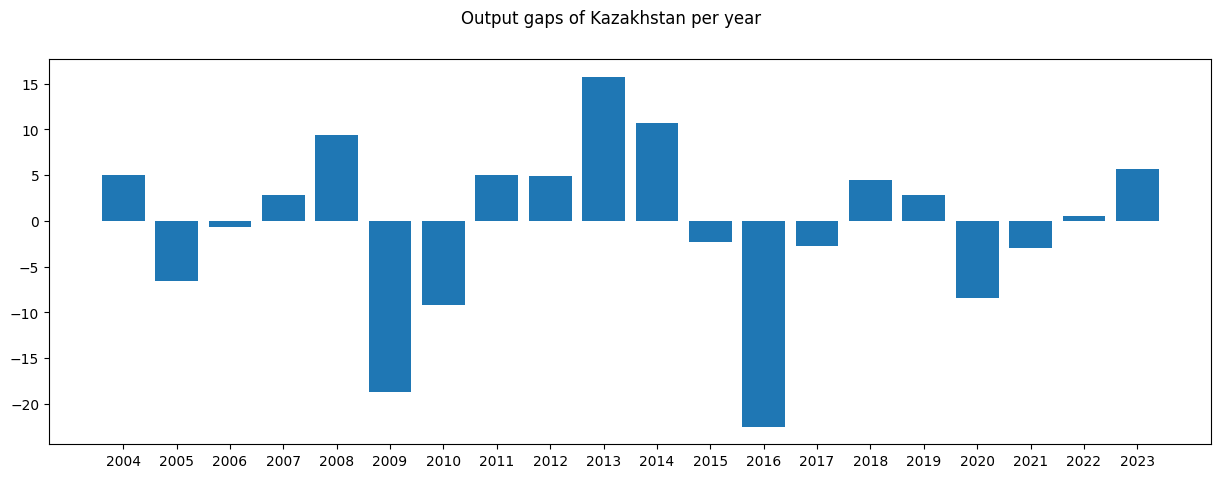

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)
ax.bar(gdp_decomp.index, gdp_decomp['output_gap'])

fig.suptitle('Output gaps of Kazakhstan per year')
plt.show()

# 🐣 Interpretation of results

## 🦀 Some information

Положительный разрыв ВВП называют инфляционным разрывом, который указывает, что рост совокупного спроса опережает рост совокупного предложения, возможно, приводя к инфляции. Отрицательный разрыв ВВП называют рецессионным разрывом, который, возможно, приводит к дефляции.
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D1%80%D1%8B%D0%B2_%D0%92%D0%92%D0%9F

По формуле *фильтра Ходрика — Прескотта* $$\min\limits_{g}\left(\sum _{t=1}^{T}{(y_{t}-g_{t})^{2}}+\lambda \sum _{t=2}^{T-1}{[(g_{t+1}-g_{t})-(g_{t}-g_{t-1})]^{2}}\right)$$
трендовая или потенциальная кривая ВВП должна во-первых, согласно первому слагаемому быть ближе к реальным значениям, во-вторых, согласно второму слагаемому, должна сглаживать резкие изменения роста или падения реальных значений ВВП. Также параметр $\lambda$ отвечает за вес каждого из слагаемых, при малых значениях: кривая тренда будет ближе к реальным данным, при больших значениях параметра: полученная кривая будет сильнее сглаженной и дальше от значений ВВП.

Казахстанская экономика сильно зависит от сырьевого сектора, а именно от нефтегазовой добычи. Казахстан входит в топ 15 стран по добыче нефти:
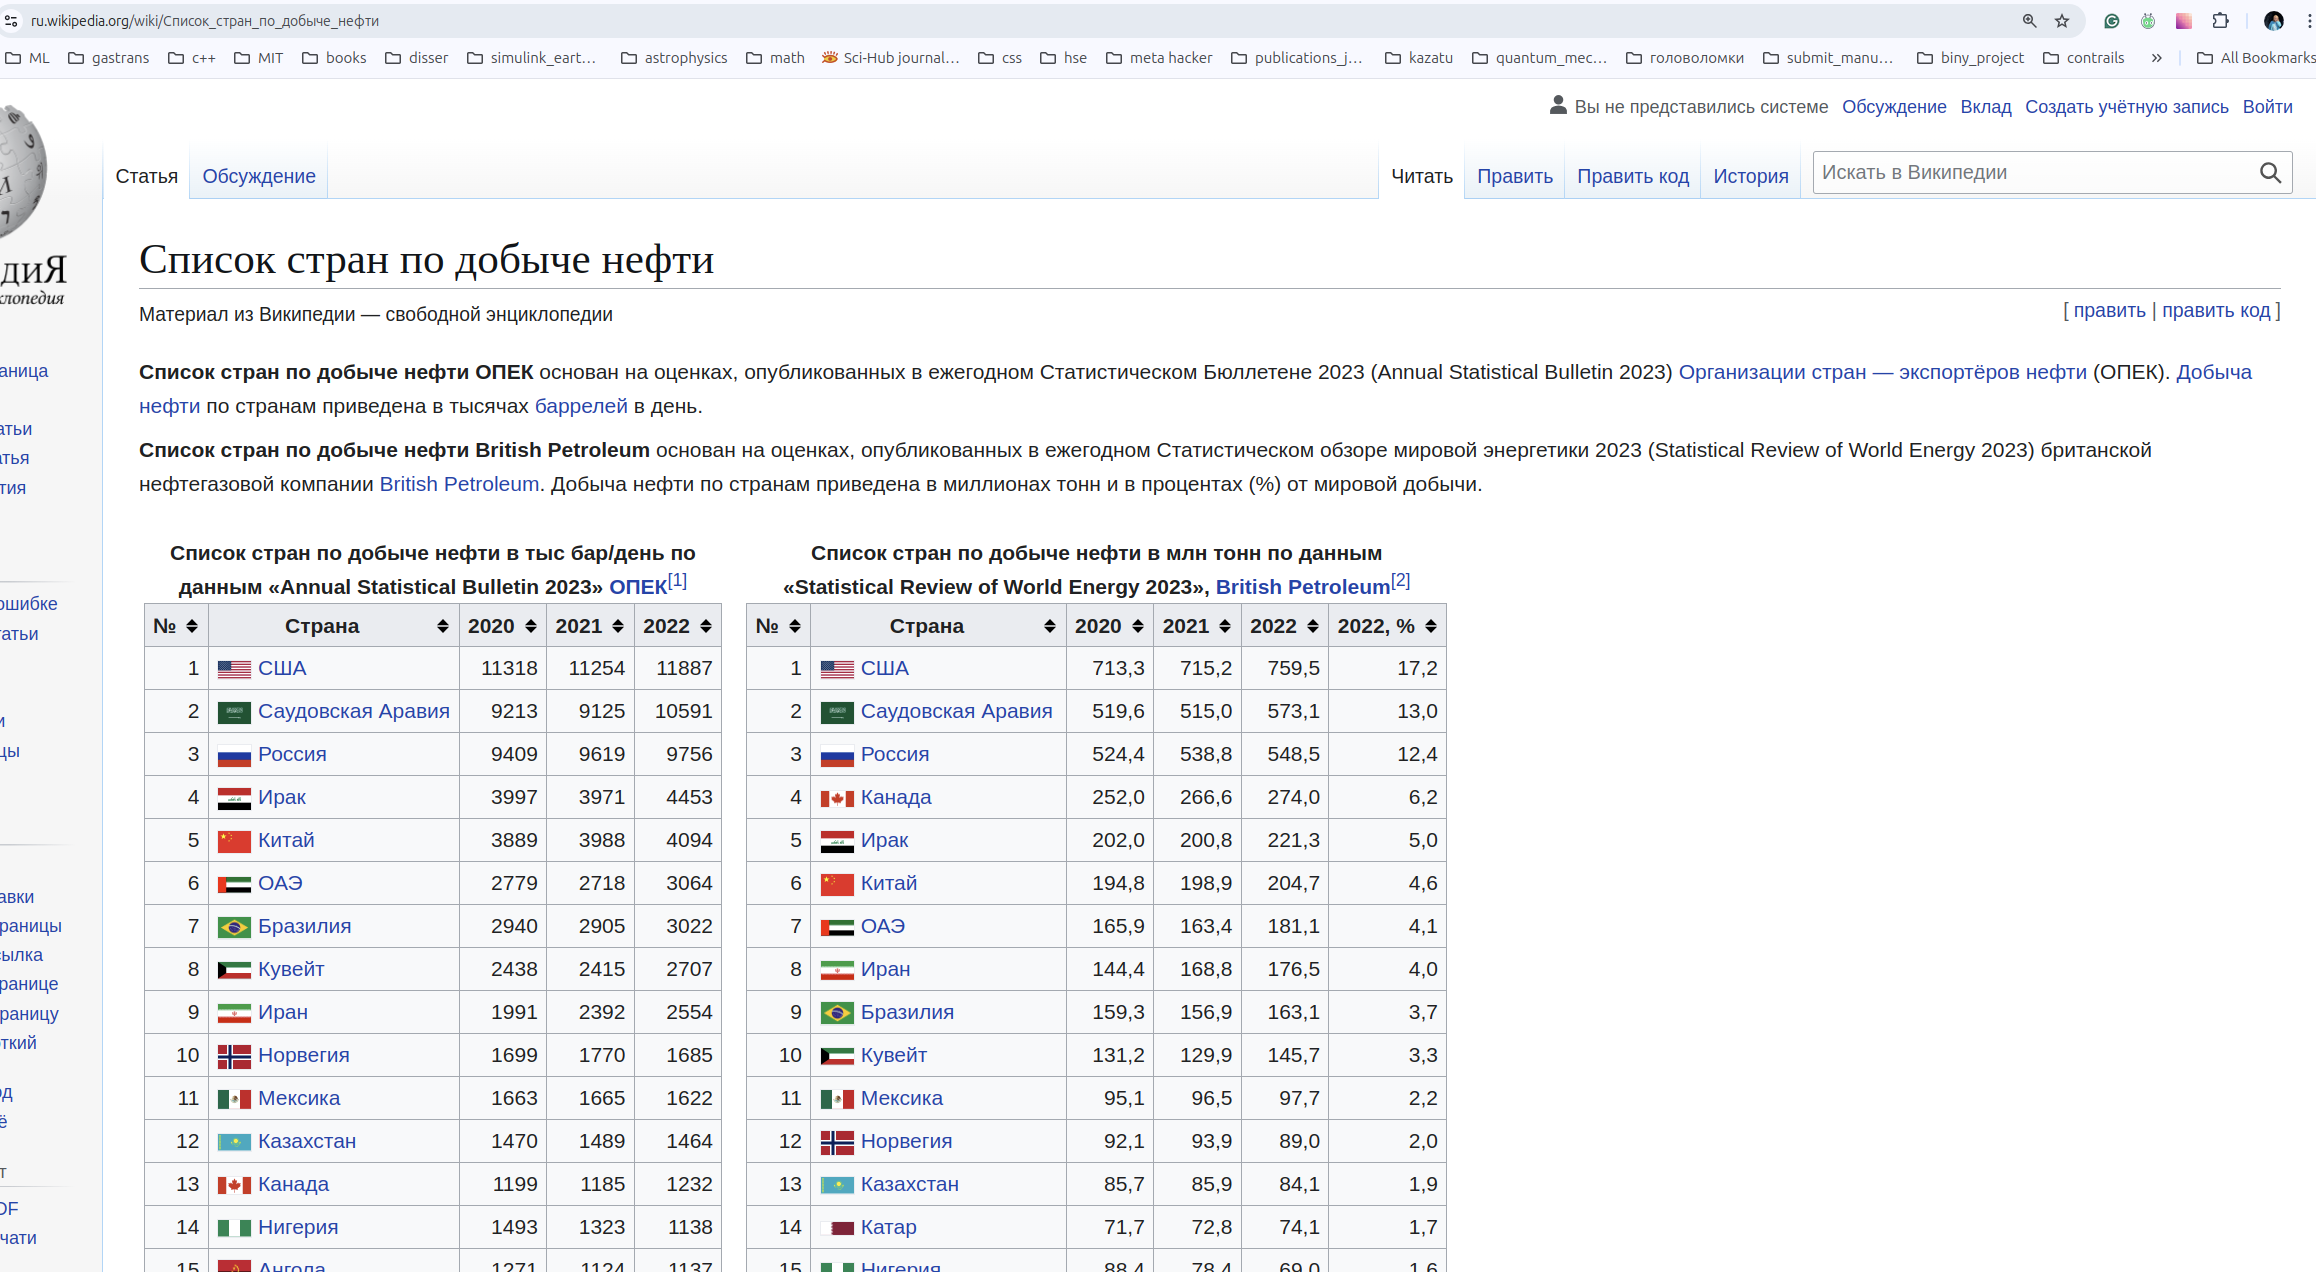

ВВП страны сильно чувствительно к рынку продажи нефти и газа.

Согласно полученному графику видны положительные и отрицательные разрывы в определенные периоды последних 20-ти лет.
1. Первый отрицательный разрыв в 2005 году связан с ростом цен на нефть, что привело к резкому увеличению ВВП. В этот период потенциальный (прогнозный) рост "не поспел" за фактическим значением.
2. В период 2008--2009 годы из-за Глобального экономического кризиса в стране была девальвация, что привело к высокой инфляции (положительный разрыв в 2008 году). Также отрицательный разрыв в 2009 году связан с падением цен на нефть с 140 долларов до 40.
3. Период 2013--2014 в экономике страны случилась снова девальвация, что привело к инфляции и положительный разрыв свидетельствует об этом.
4. Отрицательные разрывы в 2015--2016 годы связаны с избыточным предложением на рынке нефти.
5. Из-за пандемии COVID, начавшейся в 2019 году, был спад экономики во всем мире. Снизились цены на нефть и вообще экономическая активность упала, что привело к отрицательному разрыву в 2020 году.
6. Положительный гап в 2023 году связан с нестабильной ситуацией во всем мире из-за военных конфликтов в Европе и в секторе Газа.
